<img src=images/health-fitness-image.jpg>

### Project By Kim Wolf
***

#### Import Library

In [184]:
# Import modules and libraries needed for Health and Fitness Relationship project.
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import glob, os, json, datetime
from pandas import Series, DataFrame


#### Feature 1 - Load data 
Read two JSON data files.

<img src=images/exercise.jfif>
The data sets contain EXERCISE information on two different participants.

(p01) is known as participant 1, who is a 48 year old male.

In [185]:
# Read in EXERCISE data from participant one (p01).
# Display the first 5 rows of data.
p01_exercise = pd.read_json("osfstorage-archive/pmdata/p01/fitbit/exercise.json" )
p01_exercise.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,...,elevationGain,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max
0,26451905128,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94,192,1331000,1331000,1878,auto_detected,...,24.384,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26455950499,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94,302,2202000,2202000,2786,auto_detected,...,27.432,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26467488515,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",98,354,2458000,2458000,3035,auto_detected,...,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26520401069,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",97,145,1024000,1024000,1284,auto_detected,...,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26538035127,Walk,90013,"[{'minutes': 3, 'name': 'sedentary'}, {'minute...",93,121,973000,973000,1065,auto_detected,...,3.048,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(p02) is known as participant 2, who is a 60 year old male.

In [186]:
# Read in EXERCISE data from participant two (p02).
# Display the first 5 rows of data.
p02_exercise = pd.read_json("osfstorage-archive/pmdata/p02/fitbit/exercise.json" )
p02_exercise.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,...,shouldFetchDetails,distance,distanceUnit,source,speed,pace,tcxLink,swimLengths,poolLength,poolLengthUnit
0,26555895608,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",108.0,105,922000,922000,1139.0,auto_detected,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26516538165,Run,90009,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",136.0,544,4315000,4114000,10034.0,tracker,...,False,9.356687,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '...",8.188609,439.635126,NaN,NaN,NaN,NaN
2,26576453784,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",97.0,186,1280000,1280000,1939.0,auto_detected,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26580173239,Sport,15000,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",95.0,258,1792000,1792000,2741.0,auto_detected,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26580173240,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",88.0,197,1433000,1433000,1861.0,auto_detected,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Feature 2 - Clean EXERCISE data while combining
Clean data and perform a pandas merge with two data sets, then calculate some new values based on the new data set.

In [187]:
# Add 'Participant' as a new column name for participant one (p01) EXERCISE data.
# Display the first 5 rows of data.
Exercise_p01_info = p01_exercise.assign(Participant="p01")
Exercise_p01_info.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,...,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max,Participant
0,26451905128,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94,192,1331000,1331000,1878,auto_detected,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01
1,26455950499,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94,302,2202000,2202000,2786,auto_detected,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01
2,26467488515,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",98,354,2458000,2458000,3035,auto_detected,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01
3,26520401069,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",97,145,1024000,1024000,1284,auto_detected,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01
4,26538035127,Walk,90013,"[{'minutes': 3, 'name': 'sedentary'}, {'minute...",93,121,973000,973000,1065,auto_detected,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01


In [188]:
# Add 'Participant' as a new column name for participant two (p02) EXERCISE data.
# Display the first 5 rows of data.
Exercise_p02_info = p02_exercise.assign(Participant="p02")
Exercise_p02_info.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,...,distance,distanceUnit,source,speed,pace,tcxLink,swimLengths,poolLength,poolLengthUnit,Participant
0,26555895608,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",108.0,105,922000,922000,1139.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p02
1,26516538165,Run,90009,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",136.0,544,4315000,4114000,10034.0,tracker,...,9.356687,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '...",8.188609,439.635126,NaN,NaN,NaN,NaN,p02
2,26576453784,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",97.0,186,1280000,1280000,1939.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p02
3,26580173239,Sport,15000,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",95.0,258,1792000,1792000,2741.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p02
4,26580173240,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",88.0,197,1433000,1433000,1861.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p02


In [189]:
# MERGE
# Merge participant one (p01) and participant two (p02) EXERCISE data to create a new dataframe.
# Display the first 5 and last 5 rows of data.
Exercise_p_info = pd.concat([Exercise_p01_info,Exercise_p02_info])
Exercise_p_info.head(-5)

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,...,distanceUnit,source,tcxLink,speed,pace,vo2Max,Participant,swimLengths,poolLength,poolLengthUnit
0,26451905128,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94.0,192,1331000,1331000,1878.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN
1,26455950499,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94.0,302,2202000,2202000,2786.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN
2,26467488515,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",98.0,354,2458000,2458000,3035.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN
3,26520401069,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",97.0,145,1024000,1024000,1284.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN
4,26538035127,Walk,90013,"[{'minutes': 3, 'name': 'sedentary'}, {'minute...",93.0,121,973000,973000,1065.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,29952932981,Run,90009,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",119.0,218,1126000,1126000,2238.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p02,NaN,NaN,NaN
315,29975932738,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",107.0,195,1229000,1229000,1934.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p02,NaN,NaN,NaN
316,29984508918,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",95.0,229,1689000,1689000,2408.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p02,NaN,NaN,NaN
317,30000528916,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",108.0,958,5940000,5940000,9911.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p02,NaN,NaN,NaN


In [190]:
# Clean combined data file to remove unnecessary columns, create new dataframe for analysis.
Participant_info = Exercise_p_info.drop(columns=['logId','activityTypeId','calories', 'duration','activeDuration','originalStartTime','lastModified','originalDuration','logType','activityLevel','manualValuesSpecified','heartRateZones','distanceUnit','source','tcxLink','speed','pace','vo2Max','hasGps','elevationGain', 'distance','shouldFetchDetails','swimLengths','poolLength','poolLengthUnit'])
Participant_info.head(-5)

,activityName,averageHeartRate,steps,startTime,Participant
0,Walk,94.0,1878.0,2019-11-01 14:56:32,p01
1,Walk,94.0,2786.0,2019-11-01 19:03:11,p01
2,Walk,98.0,3035.0,2019-11-02 13:26:38,p01
3,Walk,97.0,1284.0,2019-11-04 21:22:08,p01
4,Walk,93.0,1065.0,2019-11-05 19:27:25,p01
...,...,...,...,...,...
314,Run,119.0,2238.0,2020-03-27 11:28:25,p02
315,Walk,107.0,1934.0,2020-03-28 16:43:07,p02
316,Walk,95.0,2408.0,2020-03-28 19:55:07,p02
317,Walk,108.0,9911.0,2020-03-29 12:40:20,p02


In [191]:
# Convert startTime to convDate. Add new column to Participant_info dataframe. 
Participant_info['convDate'] = pd.to_datetime(Participant_info['startTime']).dt.date
Participant_info.head(-5)

,activityName,averageHeartRate,steps,startTime,Participant,convDate
0,Walk,94.0,1878.0,2019-11-01 14:56:32,p01,2019-11-01
1,Walk,94.0,2786.0,2019-11-01 19:03:11,p01,2019-11-01
2,Walk,98.0,3035.0,2019-11-02 13:26:38,p01,2019-11-02
3,Walk,97.0,1284.0,2019-11-04 21:22:08,p01,2019-11-04
4,Walk,93.0,1065.0,2019-11-05 19:27:25,p01,2019-11-05
...,...,...,...,...,...,...
314,Run,119.0,2238.0,2020-03-27 11:28:25,p02,2020-03-27
315,Walk,107.0,1934.0,2020-03-28 16:43:07,p02,2020-03-28
316,Walk,95.0,2408.0,2020-03-28 19:55:07,p02,2020-03-28
317,Walk,108.0,9911.0,2020-03-29 12:40:20,p02,2020-03-29


In [192]:
# Continue cleaning data. Limit the activityName column to only include "Walk" data. The limited data set will allow for comparing one exercise type to average heart rate.
# Drop the startTime column.

Participant_info = Participant_info[Participant_info["activityName"] == "Walk"]
Participant_info = Participant_info.drop(columns=['startTime'])
Participant_info.head(-5)


,activityName,averageHeartRate,steps,Participant,convDate
0,Walk,94.0,1878.0,p01,2019-11-01
1,Walk,94.0,2786.0,p01,2019-11-01
2,Walk,98.0,3035.0,p01,2019-11-02
3,Walk,97.0,1284.0,p01,2019-11-04
4,Walk,93.0,1065.0,p01,2019-11-05
...,...,...,...,...,...
303,Walk,106.0,6341.0,p02,2020-03-20
305,Walk,116.0,2320.0,p02,2020-03-21
306,Walk,105.0,8817.0,p02,2020-03-22
309,Walk,100.0,6006.0,p02,2020-03-24


In [193]:
# Convert "convDate" column from object to datetime. 
Participant_info["convDate"] = Participant_info["convDate"].apply(pd.to_datetime)

Participant_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 320
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   activityName      353 non-null    object        
 1   averageHeartRate  353 non-null    float64       
 2   steps             353 non-null    float64       
 3   Participant       353 non-null    object        
 4   convDate          353 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 16.5+ KB


In [194]:
# Add a new column "Month" which indicates the month of the "Walk" exercise from the "convDate" column.
Participant_info["Month"] = Participant_info["convDate"].dt.month_name()

Participant_info.head(-5)

,activityName,averageHeartRate,steps,Participant,convDate,Month
0,Walk,94.0,1878.0,p01,2019-11-01,November
1,Walk,94.0,2786.0,p01,2019-11-01,November
2,Walk,98.0,3035.0,p01,2019-11-02,November
3,Walk,97.0,1284.0,p01,2019-11-04,November
4,Walk,93.0,1065.0,p01,2019-11-05,November
...,...,...,...,...,...,...
303,Walk,106.0,6341.0,p02,2020-03-20,March
305,Walk,116.0,2320.0,p02,2020-03-21,March
306,Walk,105.0,8817.0,p02,2020-03-22,March
309,Walk,100.0,6006.0,p02,2020-03-24,March


In [195]:
# Add new columns "Month" and "Year" which indicates the month and year of the "Walk" exercise from the "convDate" column.
Participant_info["Month"] = Participant_info["convDate"].dt.month_name()
Participant_info["Year"] = pd.DatetimeIndex(Participant_info['convDate']).year
Participant_info.head(-5)

,activityName,averageHeartRate,steps,Participant,convDate,Month,Year
0,Walk,94.0,1878.0,p01,2019-11-01,November,2019
1,Walk,94.0,2786.0,p01,2019-11-01,November,2019
2,Walk,98.0,3035.0,p01,2019-11-02,November,2019
3,Walk,97.0,1284.0,p01,2019-11-04,November,2019
4,Walk,93.0,1065.0,p01,2019-11-05,November,2019
...,...,...,...,...,...,...,...
303,Walk,106.0,6341.0,p02,2020-03-20,March,2020
305,Walk,116.0,2320.0,p02,2020-03-21,March,2020
306,Walk,105.0,8817.0,p02,2020-03-22,March,2020
309,Walk,100.0,6006.0,p02,2020-03-24,March,2020


In [196]:
# Create new dataframe with only participant one (p01) walk info.

p01_walk = Participant_info[Participant_info["Participant"] == "p01"]
p01_walk.head(-5)

,activityName,averageHeartRate,steps,Participant,convDate,Month,Year
0,Walk,94.0,1878.0,p01,2019-11-01,November,2019
1,Walk,94.0,2786.0,p01,2019-11-01,November,2019
2,Walk,98.0,3035.0,p01,2019-11-02,November,2019
3,Walk,97.0,1284.0,p01,2019-11-04,November,2019
4,Walk,93.0,1065.0,p01,2019-11-05,November,2019
...,...,...,...,...,...,...,...
180,Walk,98.0,8315.0,p01,2020-03-21,March,2020
181,Walk,87.0,1362.0,p01,2020-03-25,March,2020
182,Walk,100.0,3744.0,p01,2020-03-25,March,2020
183,Walk,101.0,3415.0,p01,2020-03-26,March,2020


In [197]:
# Create new dataframe with only participant two (p02) walk info.

p02_walk = Participant_info[Participant_info["Participant"] == "p02"]
p02_walk.head(-5)

,activityName,averageHeartRate,steps,Participant,convDate,Month,Year
0,Walk,108.0,1139.0,p02,2019-11-06,November,2019
2,Walk,97.0,1939.0,p02,2019-11-07,November,2019
4,Walk,88.0,1861.0,p02,2019-11-07,November,2019
5,Walk,104.0,1561.0,p02,2019-11-08,November,2019
7,Walk,93.0,1867.0,p02,2019-11-09,November,2019
...,...,...,...,...,...,...,...
303,Walk,106.0,6341.0,p02,2020-03-20,March,2020
305,Walk,116.0,2320.0,p02,2020-03-21,March,2020
306,Walk,105.0,8817.0,p02,2020-03-22,March,2020
309,Walk,100.0,6006.0,p02,2020-03-24,March,2020


#### Feature 3 - Visualize data

<img src=images/heart_rate.jfif>


#### Data Visualization
Both participants wore a tracking device to measure their average heart rate and steps while walking for exercise. The visualization charts, built using Seaborn, provide their heart's response to exercise.

<b>Histogram</b> is a representation of a frequency distribution by means of rectangles whose widths represent class intervals and whose heights represent corresponding frequencies. <i>Merriam-Webster.com</i>

Text(0, 0.5, 'Count')

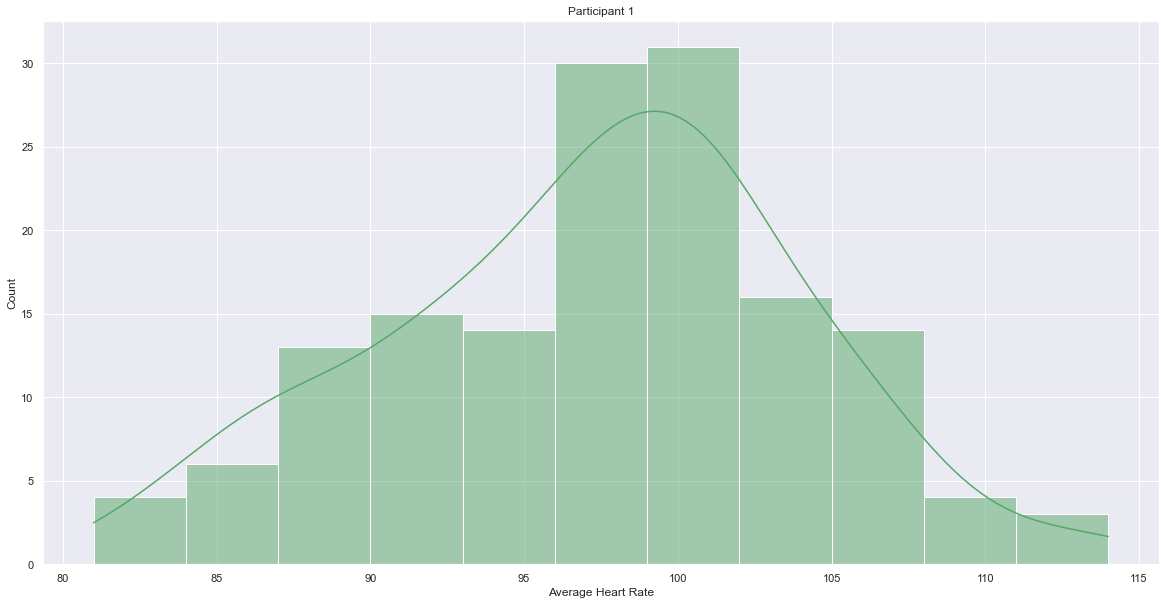

In [198]:
# Create histogram of participant one (p01) average heart rate while walking for exercise.
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.histplot(data=p01_walk, x="averageHeartRate", kde=True, color='g')
plt.title("Participant 1")
plt.xlabel("Average Heart Rate")
plt.ylabel("Count")

Interpretation: Participant 1 (p01), a 48 year old male has a normal distribution of his average Heart Rate while walking for exercise. The above histogram shows an average heart rate range 96 to 102 beat per minute (bpm).

Text(0, 0.5, 'Count')

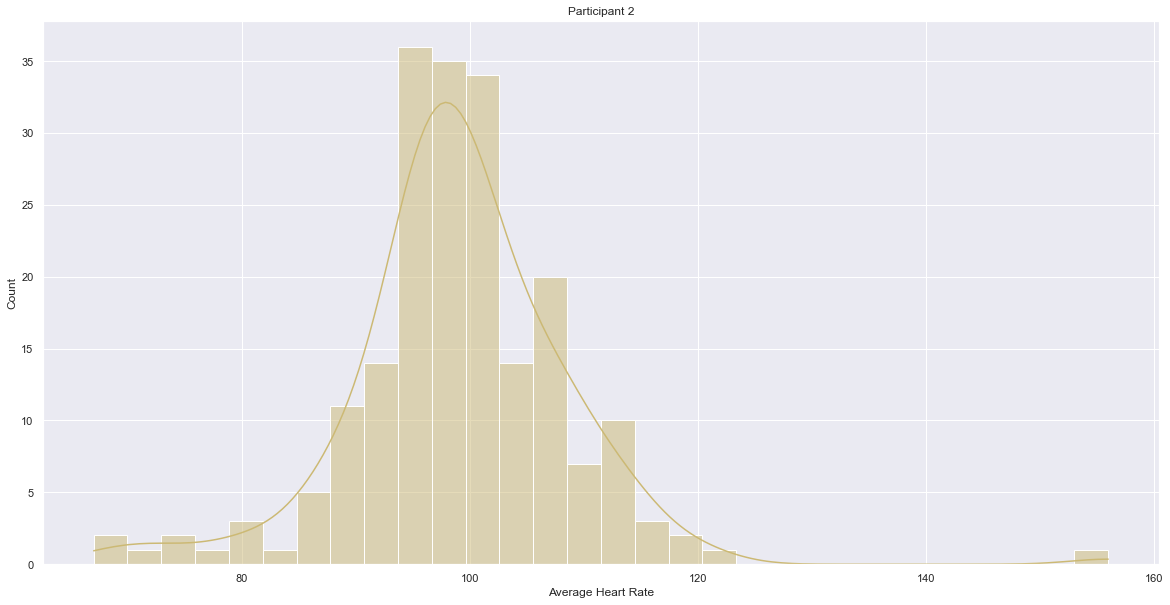

In [199]:
# Create histogram of participant 2 (p02) average heart rate while walking for exercise
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.histplot(data=p02_walk, x="averageHeartRate", kde=True, color='y')
plt.title("Participant 2")
plt.xlabel("Average Heart Rate")
plt.ylabel("Count")

Interpretation: Participant 2 (p02), a 60 year old male has a normal distribution of his average Heart Rate while walking for exercise. However the above histogram shows an outlier (to the far right). His average heart rate range is 95 to 101 beat per minute (bpm).

Text(0, 0.5, 'Count')

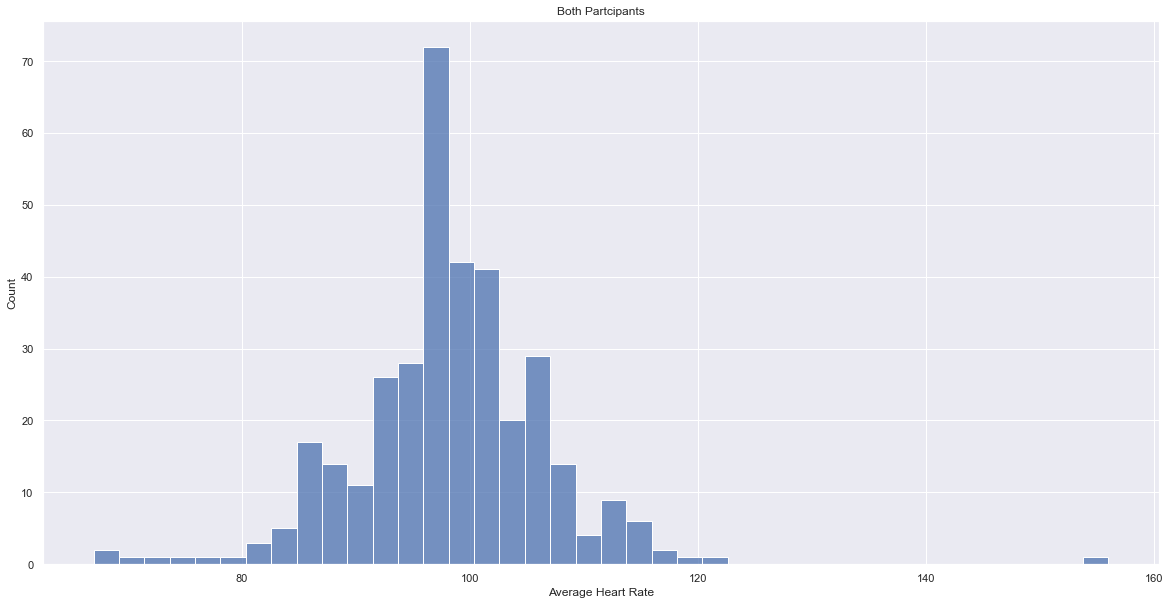

In [200]:
# Create histogram of both participants average heart rate while walking for exercise
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.histplot(Participant_info.averageHeartRate, color='b')
plt.title("Both Partcipants")
plt.xlabel("Average Heart Rate")
plt.ylabel("Count")

Interpretation: Combining Participant 1 (p01) and Participant 2 (p02) data continues to show a normal distribution of their average heart rate while walking for exercise. The outlier from Participant 2 is still included and also shows the long leading tail.

***

<b>Scatter diagram</b> is a two-dimensional graph in rectangular coordinates consisting of points whose coordinates represent values of two variables under study. <i>Merriam-Webster.com</i>

Text(13.881875, 0.5, 'Steps')

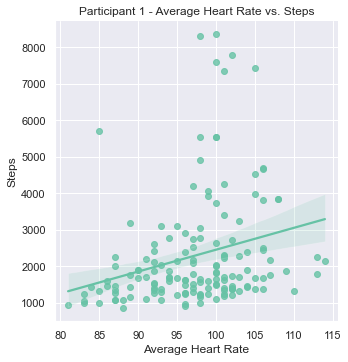

In [201]:
# Create scatter plot (aka: scatter diagram) of participant one (p01) average heart rate to their steps while walking for exercise
sns.lmplot(x='averageHeartRate', y='steps', data=p01_walk)
plt.title("Participant 1 - Average Heart Rate vs. Steps")
plt.xlabel("Average Heart Rate")
plt.ylabel("Steps")

Interpretation: The linear curve of the trend line in the scatter plot of Participant one (p01) average heart rate to number of steps shows a correlation of exercise. As steps increase, so does his average heart rate. The chart frame still indicates an average heart rate between between 80 to 115 beats per minute (bpm). 

Text(7.756875000000001, 0.5, 'Steps')

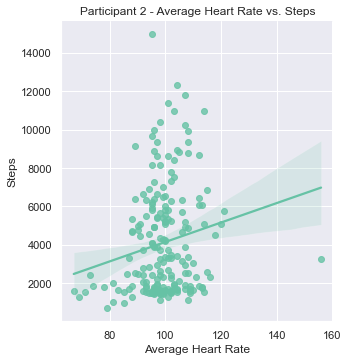

In [202]:
# Create a scatter plot (aka: scatter diagram) of participant two (p02) average heart rate to their steps while walking for exercise
sns.lmplot(x='averageHeartRate', y='steps', data=p02_walk)
plt.title("Participant 2 - Average Heart Rate vs. Steps")
plt.xlabel("Average Heart Rate")
plt.ylabel("Steps")

Interpretation: The trend line in the scatter plot of Participant two (p02) appears more steep. Yet the data points are more clustered. As steps increase, his average heart rate still remains in the 80 to 120 beats per minute (bpm). 

Text(7.756875000000001, 0.5, 'Steps')

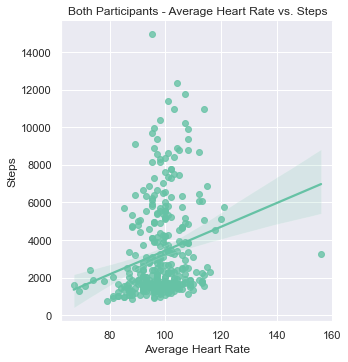

In [203]:
# Create scatterplot of both participants average heart rate to their steps while walking for exercise
sns.lmplot(x='averageHeartRate', y='steps', data=Participant_info)
plt.title("Both Participants - Average Heart Rate vs. Steps")
plt.xlabel("Average Heart Rate")
plt.ylabel("Steps")

Interpretation: The trend line in the scatter plot of combined data from both participants also appears steep. Cluster plots show an average heart rate between 80 to 120 bpm, with average steps under 4000.

***

Text(35.16054153645834, 0.5, 'Steps')

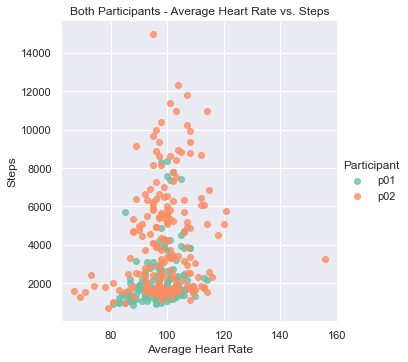

In [204]:
# Create scatterplot arguments of both participants average heart rate to their steps while walking for exercise. Use of hue to designate each participant.
sns.lmplot(x='averageHeartRate', y='steps', data=Participant_info,
           fit_reg=False, # No regression line
           hue='Participant')   # Color by evolution stage
plt.title("Both Participants - Average Heart Rate vs. Steps")
plt.xlabel("Average Heart Rate")
plt.ylabel("Steps")

Interpretation: Combined data from both participants using color coding for each participant shows Participant two (p02) averaged more steps as compared to Participant one (p01). Cluster plots show both participants average heart rate between 80 to 120 bpm, with average steps under 4000.

***

<b>Bar chart</b> is a graphic means of quantitative comparison by rectangles with lengths proportional to the measure of the data or things being compared. <i>Merriam-Webster.com</i>

Text(0, 0.5, 'Steps')

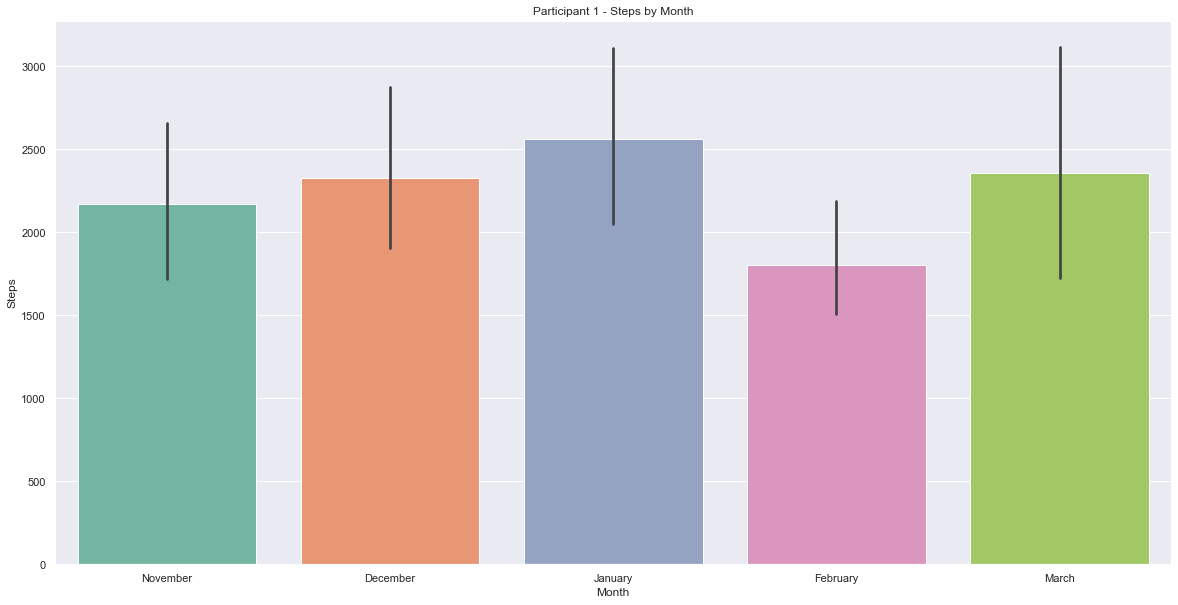

In [205]:
# Create bar chart of participant one (p01) steps by month.
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.barplot(data=p01_walk, x="Month", y="steps")
plt.title("Participant 1 - Steps by Month")
plt.xlabel("Month")
plt.ylabel("Steps")

Interpretation: Comparsion of the five month study for Participant one (p01) shows he took the largest number of steps during January and his least number of steps during February.  

Text(0, 0.5, 'Steps')

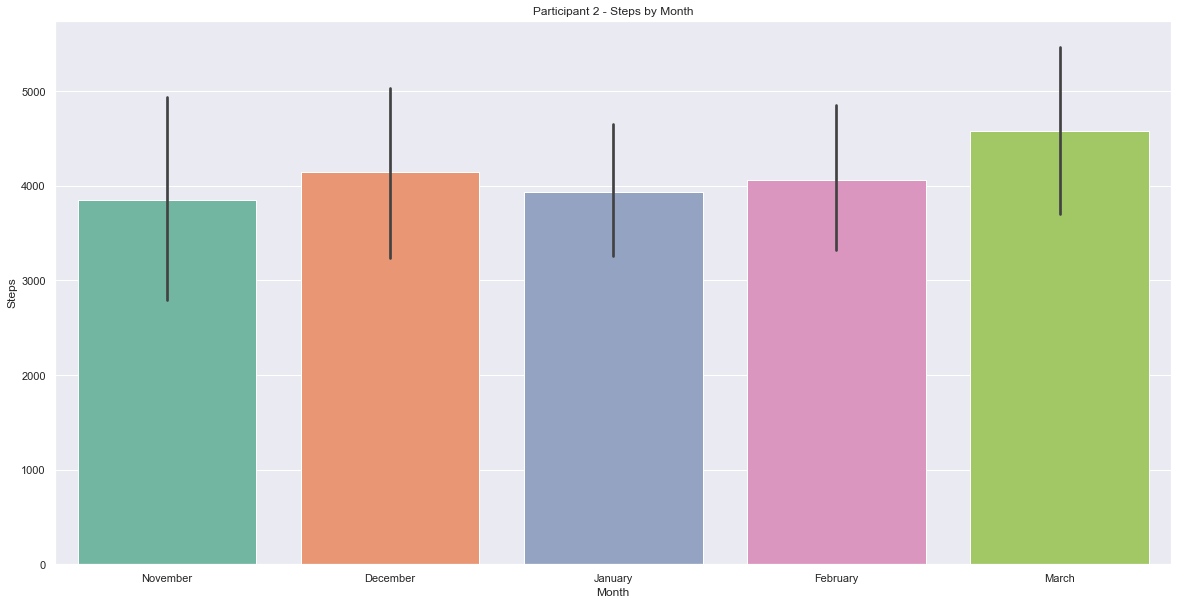

In [206]:
# Create bar chart of participant 2 (p02) steps by month
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.barplot(data=p02_walk, x="Month", y="steps")
plt.title("Participant 2 - Steps by Month")
plt.xlabel("Month")
plt.ylabel("Steps")

Interpretation: Comparsion of the five month study for Participant two (p02) shows he took the largest number of steps during March while he averaged the same number of steps during November through February. Participant two (p02) consistently had a higher step count than Participant one (p01) during the five month period.   

***

<b>Violin plot</b> is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable. <i>mode.com</i>

Text(0, 0.5, 'Average Heart Rate')

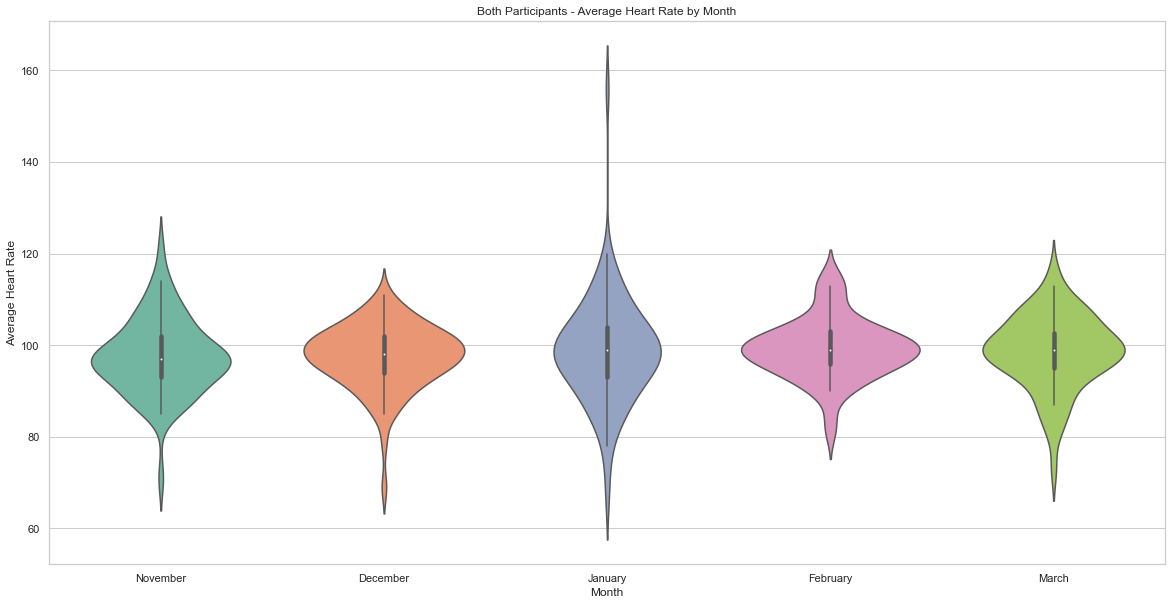

In [207]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot created to observe the distribution of both participants average heart rate by month.
# The peaks, valleys, and tails show density curve. Show where average heart rates are similar or different.
# Violin plot
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.violinplot(x='Month', y='averageHeartRate', data=Participant_info)
plt.title("Both Participants - Average Heart Rate by Month")
plt.xlabel("Month")
plt.ylabel("Average Heart Rate")

Interpretation: The five month study for both participants show their average heart rate was equal to or less than 100 bpm as depicted by the white dot in the center. The thin line represents the rest of the distribution, with the exception for points that are outliers. On each side of the thin line is a kernal density estimation to show the distribution shape of the data. The wider sections represent a higher probability of the given value. In this case, combined data for both participants indicates their average heart rate during the month while walking for exercise.

Text(0, 0.5, 'Average Heart Rate')

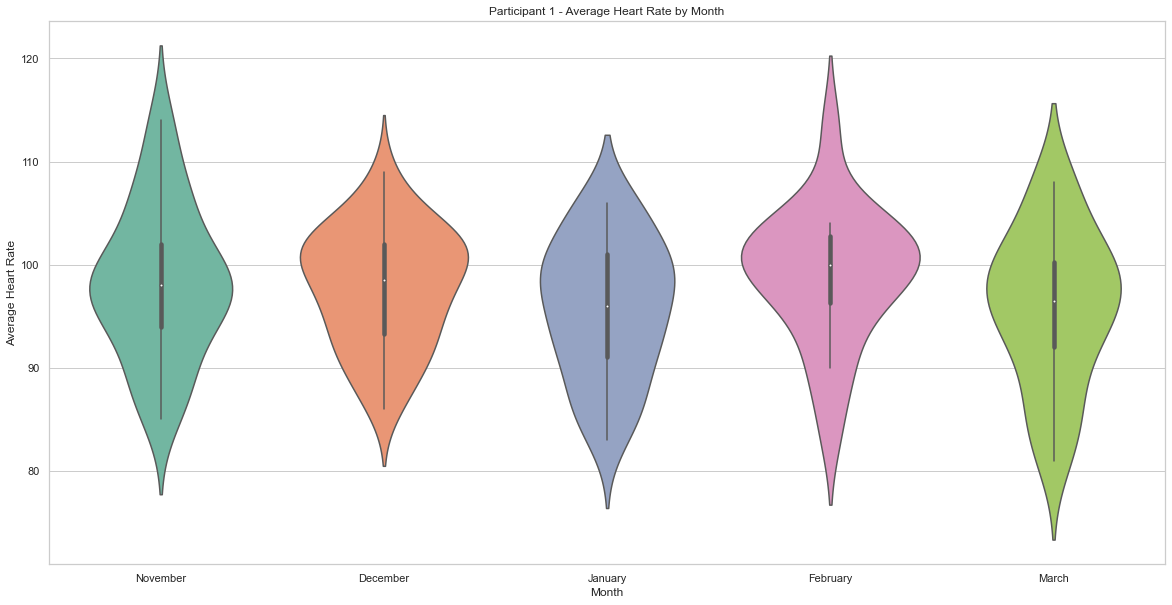

In [208]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot of particpant one (p01) average heart rate by month
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.violinplot(x='Month', y='averageHeartRate', data=p01_walk)
plt.title("Participant 1 - Average Heart Rate by Month")
plt.xlabel("Month")
plt.ylabel("Average Heart Rate")

Interpretation: The five month study for Participant one (p01) shows his average heart rate was less than 100 bpm, with the exception of February, as depicted by the white dot in the center. His average heart rate was consistently at 95 or above while walking for exercise. On each side of the thin line, the kernal density estimation shows the distribution shape of the data. Reminder the wider sections represent a higher probability of the given value.

Text(0, 0.5, 'Average Heart Rate')

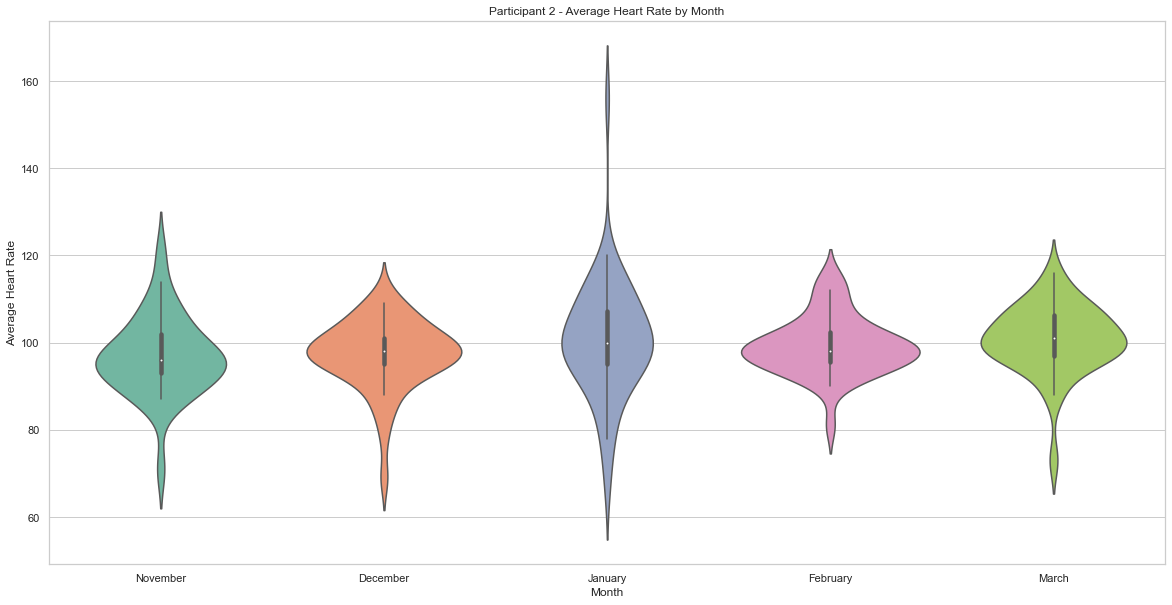

In [209]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot of particpant 2 (p02) average heart rate by month
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.violinplot(x='Month', y='averageHeartRate', data=p02_walk)
plt.title("Participant 2 - Average Heart Rate by Month")
plt.xlabel("Month")
plt.ylabel("Average Heart Rate")

Interpretation: The five month study for Participant two (p02) shows his average heart rate was 100 bpm during January and March walking exercing. However, January had more outlier than any of the other four months. 

***

<b>Heat maps</b> is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information. <i>techomedia.com</i>

A <b>pivot table</b> is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data. The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

Text(30.5, 0.5, 'Average Heart Rate')

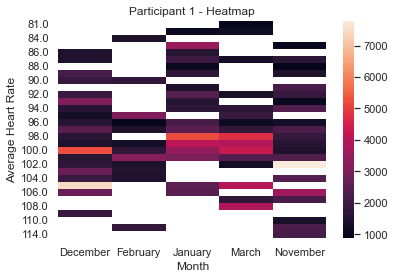

In [210]:
# Pivot table - heat map. Displays participant 1 (p01) average heart rate, steps by month.
pivot = p01_walk.pivot_table(
    index=["averageHeartRate"],
    columns=["Month"],
    values="steps",
    aggfunc=np.average)
sns.heatmap(pivot)
plt.title("Participant 1 - Heatmap")
plt.xlabel("Month")
plt.ylabel("Average Heart Rate")

Text(30.5, 0.5, 'Average Heart Rate')

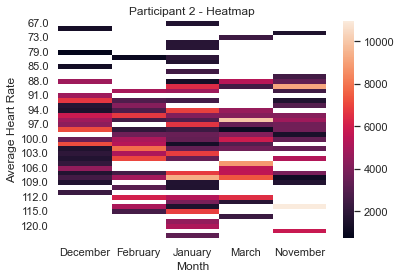

In [211]:
# Pivot table - heat map. Displays participant 2 (p02) average heart rate, steps by month.
pivot = p02_walk.pivot_table(
    index=["averageHeartRate"],
    columns=["Month"],
    values="steps",
    aggfunc=np.average)
sns.heatmap(pivot)
plt.title("Participant 2 - Heatmap")
plt.xlabel("Month")
plt.ylabel("Average Heart Rate")

Text(30.5, 0.5, 'Average Heart Rate')

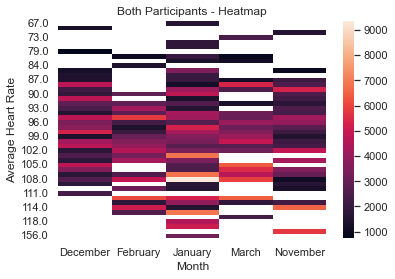

In [212]:
# Pivot table - heat map. Displays both participants average heart rate, steps by month.
pivot = Participant_info.pivot_table(
    index=["averageHeartRate"],
    columns=["Month"],
    values="steps",
    aggfunc=np.average)
sns.heatmap(pivot)
plt.title("Both Participants - Heatmap")
plt.xlabel("Month")
plt.ylabel("Average Heart Rate")

***

#### Feature 4 - Best practices
Throughout this Jupyter notebook, I consistently used the markdown feature to explain the data sets and actions taken to clean the data. Also, included definitions and interpretation for the various data visualization charts.

***

#### Feature 5 - Interpretation

The five month study of two males who walked for exercise showed a direct correlation between walking and their average heart rate.

<u>Knowing Max Heart Rates</u> - 
Researchers have come up with a simple way to understand your maximum heart rate during exercise. It is possible to overwork the heart, which makes the heart rate a critical tool for your health and fitness success.

Subtract your current age from 220. A 30-year-old person would have a max heart rate of 190 BPM, for instance. You shouldn’t record your heart rate going above that threshold. It keeps you in a safe zone for your age.

This heart rate is a general rule for the public. There are differences when it comes to gender, height and medical issues. However, these factors only influence the measurement in minute amounts. Doctors and fitness instructors believe wholeheartedly in today’s calculated max heart rates.

In conclusion, regular cardio exercise, like brisk walking, offers a wide range of physical and mental benefits. Some well-researched benefits include:

* <b>Weight loss</b>. Walking can help you lose excess weight by burning more calories, increasing lean muscle mass, and boosting your mood so you’re more likely to keep on walking.
* <b>Improved cardiovascular health</b>. According to a review of studiesTrusted Source, walking 5 days a week can help lower your risk for heart disease. Regular cardio exercise may also help lower the levels of LDL (bad) cholesterol in your blood.
* <b>Lower blood pressure</b>. Research has found that regular cardio exercise may help lower your blood pressure.
* <b>Lower blood sugar</b>. Regular brisk walks can increase your insulin sensitivity. This means the cells in your muscles are better able to use insulin to draw in glucose for energy, both before and after you’ve exercised.
* <b>Improved mental health</b>. Research has also shown that exercise can boost self-esteem, improve sleep, build brain power, and more.

<b>If you want to make a difference in your life, step away from the computer and take a walk! #Health_and_Fitness</b>